###  House Prices: Advanced Regression Techniques

#### Competition Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
#### Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting
#### Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import (load_data, print_dataset_info, split_dataset, 
                              auto_scatter_simple,load_dataset,detect_outliers,
                              one_hot_dataframe)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

pd.set_option('display.width', 200)
pd.set_option('precision', 4)

sns.set_style("whitegrid")

sns.set_palette(sns.color_palette("muted", 15))

In [2]:
load_app_config()
DIRECTORY="kaggle_housing"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'SalePrice'
input_path = get_datafolder_path()

train_file = os.path.join(input_path, DIRECTORY, TRAIN_FILE)
test_file = os.path.join(input_path, DIRECTORY, TEST_FILE)
print(train_file)
print(test_file)

train_dataset,feature_columns,response_column,continuous_predictors,categorical_predictors = load_dataset(train_file,RESPONSE)
test_dataset,tfeature_columns,tresponse_column,tcontinuous_predictors,tcategorical_predictors  = load_dataset(test_file,RESPONSE,colseparator=',')

train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]
test_X  = test_dataset[tfeature_columns]

###
#TotalBsmtSF =BsmtFinSF1 + BsmtFinSF2 +BsmtUnfSF
#'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
#GrLivArea = 1stFlrSF +2ndFlrSF
#continuous.append('Log_SalePrice')


Adding F:\DataSource  to system path
Adding F:\MachineLearning  to system path
F:\DataSource\kaggle_housing\train.csv
F:\DataSource\kaggle_housing\test.csv
 input file is :F:\DataSource\kaggle_housing\train.csv loaded.
Continous Variables
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Variables
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2n

In [3]:
continuous  =['LotFrontage', 'LotArea','MasVnrArea','TotalBsmtSF','YearRemodAdd','YearBuilt','YrSold','TotRmsAbvGrd',
              'LowQualFinSF', 'GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','1stFlrSF','BsmtFinSF2','BsmtFinSF1',
              '2ndFlrSF','BsmtUnfSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','SalePrice']

ordinal_predictors =['MSSubClass','OverallQual','OverallCond']
for predictor in ordinal_predictors:
    continuous_predictors.remove(predictor)
    categorical_predictors.append(predictor)
    
print(continuous_predictors) 
print(categorical_predictors)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC

In [4]:
print(len(continuous_predictors) +len(categorical_predictors) )

81


In [5]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*35,"feature columns"))
    print(feature_columns)
    print("shape of dataset: {0}".format(input_dataset.shape))
    print("<{0} {1} {0}>".format("="*35,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-y"))
    print(y.describe())
    
    
display_data_descriptives(train_dataset,train_X,feature_columns,train_y,response_column)

<=================================== feature columns ===================================>
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'Woo

In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0000,1201.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1452.0000,1460.0000,...,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.000,1460.0000,1460.0000,1460.0000
mean,730.50,56.8973,70.0500,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.6853,443.6397,...,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.489,6.3219,2007.8158,180921.1959
std,421.61,42.3006,24.2848,9981.2649,1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,...,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.123,2.7036,1.3281,79442.5029
min,1.00,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,1.0000,2006.0000,34900.0000
25%,365.75,20.0000,59.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,5.0000,2007.0000,129975.0000
50%,730.50,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,...,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.000,6.0000,2008.0000,163000.0000
75%,1095.25,70.0000,80.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,166.0000,712.2500,...,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.000,8.0000,2009.0000,214000.0000
max,1460.00,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,...,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.000,12.0000,2010.0000,755000.0000


In [8]:
train_dataset[categorical_predictors].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Y,NaN,NaN,NaN,WD,Normal,20,6,8
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,Y,NaN,NaN,NaN,WD,Abnorml,70,7,5
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,8,5


In [9]:
full_dataset =pd.concat(objs=[train_dataset, test_dataset], axis=0).reset_index(drop=True)

check_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"Full Dataset null value count"))
print(check_null)

<=================================== Full Dataset null value count ===================================>
Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64


In [10]:
train_dataset['Log_SalePrice'] =  np.log(train_dataset['SalePrice']+1)
#continuous.append('Log_SalePrice')

In [11]:
print(len(continuous_predictors))
 
def dist_plots(train_dataset,continuous_features):
    fig = plt.figure(figsize=(12, 8),dpi=300)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(3,4, i+1)
        sns.distplot(train_dataset[train_dataset[continuous_features[i]].notnull()][continuous_features[i]],ax=ax ,
                     kde =False,hist_kws=dict(alpha=1))
        sns.despine()
    plt.tight_layout()
    plt.show()


35


In [12]:
subclass = train_dataset.groupby(['MSSubClass'])['SalePrice'].agg(["sum","count","mean"])
print(subclass.sort_values(by ='sum'))



                 sum  count         mean
MSSubClass                              
40            624500      4  156125.0000
180          1023000     10  102300.0000
45           1303100     12  108591.6667
85           2956200     20  147810.0000
75           3079000     16  192437.5000
190          3888400     30  129613.3333
30           6612251     69   95829.7246
90           6944136     52  133541.0769
160          8734785     63  138647.3810
80           9844720     58  169736.5517
70          10006345     60  166772.4167
120         17467780     87  200779.0805
50          20635628    144  143302.9722
60          71744602    299  239948.5017
20          99280499    536  185224.8116


In [13]:
zoning = train_dataset.groupby(['MSZoning'])['SalePrice'].agg(["sum","count","mean"])
print(zoning.sort_values(by ='sum'))

                sum  count         mean
MSZoning                               
C (all)      745280     10   74528.0000
RH          2104934     16  131558.3750
FV         13910914     65  214014.0615
RM         27537069    218  126316.8303
RL        219846749   1151  191004.9948


In [14]:
#fig = plt.figure(figsize=(4,3),dpi=100)
#fig = plt.figure(figsize=(4,3),dpi=100)


In [15]:
full_dataset[( (full_dataset['PoolQC'].isnull()) & (full_dataset['PoolArea']!=0) )]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2420,1647,0,0,NaN,3,1Fam,TA,No,595.0,354.0,...,WD,0,Pave,6,1105.0,AllPub,225,1953,1953,2007
2503,1105,717,0,NaN,4,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,1105.0,AllPub,0,1984,1984,2007
2599,2034,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,WD,0,Pave,9,0.0,AllPub,483,1953,1953,2007


In [16]:
full_dataset[( (full_dataset['PoolQC'].notnull()) & (full_dataset['PoolArea']!=0) )][['PoolQC','PoolArea']]

,PoolQC,PoolArea
197,Ex,512
810,Fa,648
1170,Gd,576
1182,Ex,555
1298,Gd,480
1386,Fa,519
1423,Gd,738
1974,Ex,144
2573,Ex,228
2710,Gd,800


In [17]:
full_dataset[( (full_dataset['PoolQC'].notnull()) & (full_dataset['PoolArea']!=0) )].groupby(['PoolQC'])['PoolArea'].median()

PoolQC
Ex    370.0
Fa    583.5
Gd    657.0
Name: PoolArea, dtype: float64

In [18]:
full_dataset.loc[2420,'PoolQC'] = 'Ex'
full_dataset.loc[2503,'PoolQC'] = 'Ex'
full_dataset.loc[2599,'PoolQC'] = 'Fa'

In [19]:
null_category = list(set(check_null.index) & set(categorical_predictors))
non_null_category  = set(categorical_predictors) -set(null_category) 
print("Categorical values having null")
print(null_category)
null_continuous =list(set(check_null.index) - set(categorical_predictors))
print(response_column)
null_continuous.remove(response_column[0])
print("Continuous values having null")
print(null_continuous)

default_NA_category= {'Functional':'0Not Applicable','MasVnrType':'0Not Applicable','MiscFeature':'0Not Applicable',
                      'Fence':'0No Fence','PoolQC': '0No Pool','Alley':'0No Alley Access',
                      'GarageCond':'0No Garage','BsmtCond':'0No Basement', 'BsmtFinType1':'0No Basement',
                      'GarageType':'0No Garage','KitchenQual':'0Not Rated','FireplaceQu':'0No Fire Place',
                      'MSZoning':'0No Zone','Electrical':'0Not specified','GarageQual':'0No Garage',
                      'Utilities':'0Not Specified','GarageFinish':'0No Garage','BsmtFinType2':'0No Basement',
                      'Exterior2nd':'0Not Specified ','BsmtExposure':'0No Basement','BsmtQual':'0No Basement',
                      'Exterior1st': '0Not Specified','SaleType':'0Not Specified'
                      
                  }
for item in null_category:
    full_dataset[item].fillna(default_NA_category[item], inplace=True)
    full_dataset[item] =full_dataset[item].apply(lambda x :str(x).upper())
    item_mapper = {v:k for k,v  in enumerate(sorted(full_dataset[item].unique()))}
    print('mapping for :{0}'.format(item))
    print(item_mapper)
    full_dataset[item] =full_dataset[item].map(item_mapper) 
    print(full_dataset[item].unique())


Categorical values having null
['BsmtCond', 'Alley', 'SaleType', 'GarageType', 'GarageCond', 'Exterior1st', 'BsmtFinType1', 'Electrical', 'MasVnrType', 'Fence', 'Functional', 'Utilities', 'GarageQual', 'Exterior2nd', 'PoolQC', 'MiscFeature', 'GarageFinish', 'FireplaceQu', 'MSZoning', 'KitchenQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2']
['SalePrice']
Continuous values having null
['BsmtFinSF1', 'GarageCars', 'BsmtFinSF2', 'GarageYrBlt', 'TotalBsmtSF', 'LotFrontage', 'BsmtHalfBath', 'BsmtFullBath', 'GarageArea', 'BsmtUnfSF', 'MasVnrArea']
mapping for :BsmtCond
{'FA': 1, 'GD': 2, '0NO BASEMENT': 0, 'TA': 4, 'PO': 3}
[4 2 0 1 3]
mapping for :Alley
{'0NO ALLEY ACCESS': 0, 'GRVL': 1, 'PAVE': 2}
[0 1 2]
mapping for :SaleType
{'CONLW': 5, 'CONLD': 3, 'COD': 1, 'NEW': 7, 'CONLI': 4, '0NOT SPECIFIED': 0, 'OTH': 8, 'CWD': 6, 'WD': 9, 'CON': 2}
[9 7 1 3 4 6 5 2 8 0]
mapping for :GarageType
{'2TYPES': 1, 'BUILTIN': 4, 'ATTCHD': 2, 'CARPORT': 5, 'DETCHD': 6, '0NO GARAGE': 0, 'BASMENT': 3}
[2 6

In [20]:
for item in non_null_category:
    full_dataset[item] =full_dataset[item].apply(lambda x :str(x).upper())
    item_mapper = {v:k for k,v  in enumerate(sorted(full_dataset[item].unique()))}
    print('mapping for :{0}'.format(item))
    print(item_mapper)
    full_dataset[item] =full_dataset[item].map(item_mapper) 
    print(full_dataset[item].unique())

mapping for :ExterCond
{'FA': 1, 'GD': 2, 'TA': 4, 'PO': 3, 'EX': 0}
[4 2 1 3 0]
mapping for :SaleCondition
{'FAMILY': 3, 'NORMAL': 4, 'ALLOCA': 2, 'ADJLAND': 1, 'ABNORML': 0, 'PARTIAL': 5}
[4 0 5 1 2 3]
mapping for :RoofMatl
{'MEMBRAN': 2, 'METAL': 3, 'COMPSHG': 1, 'WDSHNGL': 7, 'ROLL': 4, 'CLYTILE': 0, 'TAR&GRV': 5, 'WDSHAKE': 6}
[1 7 3 6 2 5 4 0]
mapping for :BldgType
{'TWNHS': 3, '2FMCON': 1, 'DUPLEX': 2, 'TWNHSE': 4, '1FAM': 0}
[0 1 2 4 3]
mapping for :Street
{'GRVL': 0, 'PAVE': 1}
[1 0]
mapping for :LotConfig
{'FR2': 2, 'CULDSAC': 1, 'FR3': 3, 'INSIDE': 4, 'CORNER': 0}
[4 2 0 1 3]
mapping for :LotShape
{'REG': 3, 'IR2': 1, 'IR1': 0, 'IR3': 2}
[3 0 1 2]
mapping for :Foundation
{'SLAB': 3, 'PCONC': 2, 'WOOD': 5, 'BRKTIL': 0, 'STONE': 4, 'CBLOCK': 1}
[2 1 0 5 3 4]
mapping for :Heating
{'OTHW': 4, 'WALL': 5, 'GASA': 1, 'GRAV': 3, 'FLOOR': 0, 'GASW': 2}
[1 2 3 5 4 0]
mapping for :LandSlope
{'GTL': 0, 'SEV': 2, 'MOD': 1}
[0 1 2]
mapping for :RoofStyle
{'SHED': 5, 'GABLE': 1, 'FLAT': 0,

In [21]:
full_dataset[null_category].head()

,BsmtCond,Alley,SaleType,GarageType,GarageCond,Exterior1st,BsmtFinType1,Electrical,MasVnrType,Fence,...,Exterior2nd,PoolQC,MiscFeature,GarageFinish,FireplaceQu,MSZoning,KitchenQual,BsmtQual,BsmtExposure,BsmtFinType2
0,4,0,9,2,5,13,3,5,2,0,...,14,0,0,2,0,4,3,3,4,6
1,4,0,9,2,5,9,1,5,3,0,...,9,0,0,2,5,4,4,3,2,6
2,4,0,9,2,5,13,3,5,2,0,...,14,0,0,2,5,4,3,3,3,6
3,2,0,9,6,5,14,1,5,3,0,...,16,0,0,3,3,4,3,4,4,6
4,4,0,9,2,5,13,3,5,2,0,...,14,0,0,2,5,4,3,3,1,6


In [22]:
full_dataset[null_continuous].head()

,BsmtFinSF1,GarageCars,BsmtFinSF2,GarageYrBlt,TotalBsmtSF,LotFrontage,BsmtHalfBath,BsmtFullBath,GarageArea,BsmtUnfSF,MasVnrArea
0,706.0,2.0,0.0,2003.0,856.0,65.0,0.0,1.0,548.0,150.0,196.0
1,978.0,2.0,0.0,1976.0,1262.0,80.0,1.0,0.0,460.0,284.0,0.0
2,486.0,2.0,0.0,2001.0,920.0,68.0,0.0,1.0,608.0,434.0,162.0
3,216.0,3.0,0.0,1998.0,756.0,60.0,0.0,1.0,642.0,540.0,0.0
4,655.0,3.0,0.0,2000.0,1145.0,84.0,0.0,1.0,836.0,490.0,350.0


In [23]:
# id 2121 has 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','GarageArea','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'
# id 2189 has BsmtFullBath,BsmtHalfBath , we may need to have -1 to indicate not specified
# if MasVnrType is NA then MasVnrType,then MasVnrArea is zero
# id 2577 'GarageCars' 
#'GarageYrBlt' 
null_continuous_index = {}

for item in null_continuous:
    null_continuous_index[item]=full_dataset[full_dataset[item].isnull()].index.tolist()
    
for k,v in null_continuous_index.items():
    print("Feature :{0} and number of null values={1}".format(k,len(v)))
    print(v)

  

Feature :BsmtFinSF1 and number of null values=1
[2120]
Feature :LotFrontage and number of null values=486
[7, 12, 14, 16, 24, 31, 42, 43, 50, 64, 66, 76, 84, 95, 100, 104, 111, 113, 116, 120, 126, 131, 133, 136, 147, 149, 152, 153, 160, 166, 169, 170, 177, 180, 186, 191, 203, 207, 208, 214, 218, 221, 234, 237, 244, 249, 269, 287, 288, 293, 307, 308, 310, 319, 328, 330, 335, 342, 346, 347, 351, 356, 360, 361, 364, 366, 369, 370, 375, 384, 392, 393, 404, 405, 412, 421, 426, 447, 452, 457, 458, 459, 465, 470, 484, 490, 496, 516, 518, 529, 537, 538, 539, 541, 545, 559, 560, 564, 569, 580, 593, 610, 611, 612, 616, 623, 626, 641, 645, 660, 666, 668, 672, 679, 682, 685, 687, 690, 706, 709, 714, 720, 721, 726, 734, 745, 746, 751, 757, 770, 783, 785, 789, 791, 794, 811, 816, 817, 822, 828, 840, 845, 851, 853, 855, 856, 859, 865, 868, 879, 882, 893, 900, 904, 908, 911, 917, 925, 927, 928, 929, 939, 941, 944, 953, 961, 967, 975, 980, 983, 988, 996, 997, 1003, 1006, 1017, 1018, 1024, 1030, 1032, 1

In [24]:
#GarageCars
#GarageArea
#BsmtFullBath
#BsmtUnfSF 
#BsmtFinSF2
#BsmtHalfBath
#TotalBsmtSF

full_dataset.loc[null_continuous_index['GarageCars'],'GarageCars'] = 0
full_dataset.loc[null_continuous_index['GarageArea'],'GarageArea'] = 0
full_dataset.loc[null_continuous_index['BsmtFullBath'],'BsmtFullBath'] = -1 
full_dataset.loc[null_continuous_index['BsmtUnfSF'],'BsmtUnfSF'] = 0
full_dataset.loc[null_continuous_index['BsmtFinSF2'],'BsmtFinSF2'] = 0
full_dataset.loc[null_continuous_index['BsmtFinSF1'],'BsmtFinSF1'] = 0
full_dataset.loc[null_continuous_index['BsmtHalfBath'],'BsmtHalfBath'] = -1
full_dataset.loc[null_continuous_index['TotalBsmtSF'],'TotalBsmtSF'] = 0
full_dataset.loc[null_continuous_index['MasVnrArea'],'MasVnrArea'] = 0
full_dataset.loc[null_continuous_index['GarageYrBlt'],'GarageYrBlt'] = -1

In [25]:
check_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"Full Dataset null value count"))
print(check_null)

<=================================== Full Dataset null value count ===================================>
LotFrontage     486
SalePrice      1459
dtype: int64


In [26]:
#full_dataset.iloc[null_continuous_index['LotFrontage']] 
#
from sklearn.ensemble import RandomForestRegressor
LotFrontage_nonzero = full_dataset[~full_dataset['LotFrontage'].isnull()]
LotFrontage_zero = full_dataset[full_dataset['LotFrontage'].isnull()]

LotFrontage_test = full_dataset[full_dataset['LotFrontage'].isnull()]
print(LotFrontage_test.shape)
LotFrontage_test.drop('Id',inplace =True ,axis=1)
LotFrontage_test.drop('SalePrice',inplace =True,axis=1)
LotFrontage_test.drop('LotFrontage',inplace =True,axis =1)
check_null = LotFrontage_test.isnull().sum()[LotFrontage_test.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"LotFrontage_test null value count"))
print(check_null)

(486, 81)
<=================================== LotFrontage_test null value count ===================================>
Series([], dtype: int64)


F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShell

In [27]:
LotFrontage_train = full_dataset[~full_dataset['LotFrontage'].isnull()]
print(LotFrontage_train.shape)
LotFrontage_response = LotFrontage_train['LotFrontage']
LotFrontage_train.drop('LotFrontage',inplace =True,axis =1)
LotFrontage_train.drop('SalePrice',inplace =True,axis =1)
LotFrontage_train.drop('Id',inplace =True,axis =1)
LotFrontage_features = LotFrontage_train
check_null = LotFrontage_features.isnull().sum()[LotFrontage_features.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"LotFrontage_features null value count"))
print(check_null)



(2433, 81)
<=================================== LotFrontage_features null value count ===================================>
Series([], dtype: int64)


F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:

rfr =RandomForestRegressor(n_estimators=200)
rfr.fit(LotFrontage_features,LotFrontage_response)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [29]:
rfr_values = rfr.predict(LotFrontage_test)
LotFrontage_zero['LotFrontage'] =rfr_values

F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
 
full_dataset =pd.concat(objs=[LotFrontage_nonzero, LotFrontage_zero], axis=0).reset_index(drop=True)
check_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"Full Dataset null value count"))
print(check_null)

<=================================== Full Dataset null value count ===================================>
SalePrice    1459
dtype: int64


In [31]:
area_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
full_dataset["TotalArea"] = full_dataset[area_columns].sum(axis=1)
full_dataset["Log_TotalArea"] = np.log(full_dataset["TotalArea"])
full_dataset.drop(area_columns,axis =1,inplace=True)
full_dataset[["TotalArea","Log_TotalArea"]].head()
continuous_predictors = list(set(continuous_predictors) - set(area_columns))
continuous_predictors

['Id',
 'YearBuilt',
 'SalePrice',
 'GarageCars',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'TotRmsAbvGrd',
 'HalfBath',
 'BsmtHalfBath',
 'BsmtFullBath',
 'Fireplaces',
 'MiscVal',
 'FullBath',
 'YrSold',
 'YearRemodAdd',
 'MoSold']

In [32]:
Z

NameError: name 'Z' is not defined

In [33]:
train_dataset =full_dataset[full_dataset['SalePrice'].notnull()]
test_dataset =full_dataset[full_dataset['SalePrice'].isnull()]
train_dataset['Log_SalePrice'] =  np.log(train_dataset['SalePrice']+1)


if 'Log_SalePrice' not in continuous_predictors:
    continuous_predictors.append('Log_SalePrice')
if "Log_TotalArea" not in continuous_predictors:
    continuous_predictors.append('Log_TotalArea')
    
print(len(continuous_predictors))
print(continuous_predictors)



19
['Id', 'YearBuilt', 'SalePrice', 'GarageCars', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'TotRmsAbvGrd', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'Fireplaces', 'MiscVal', 'FullBath', 'YrSold', 'YearRemodAdd', 'MoSold', 'Log_SalePrice', 'Log_TotalArea']


F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


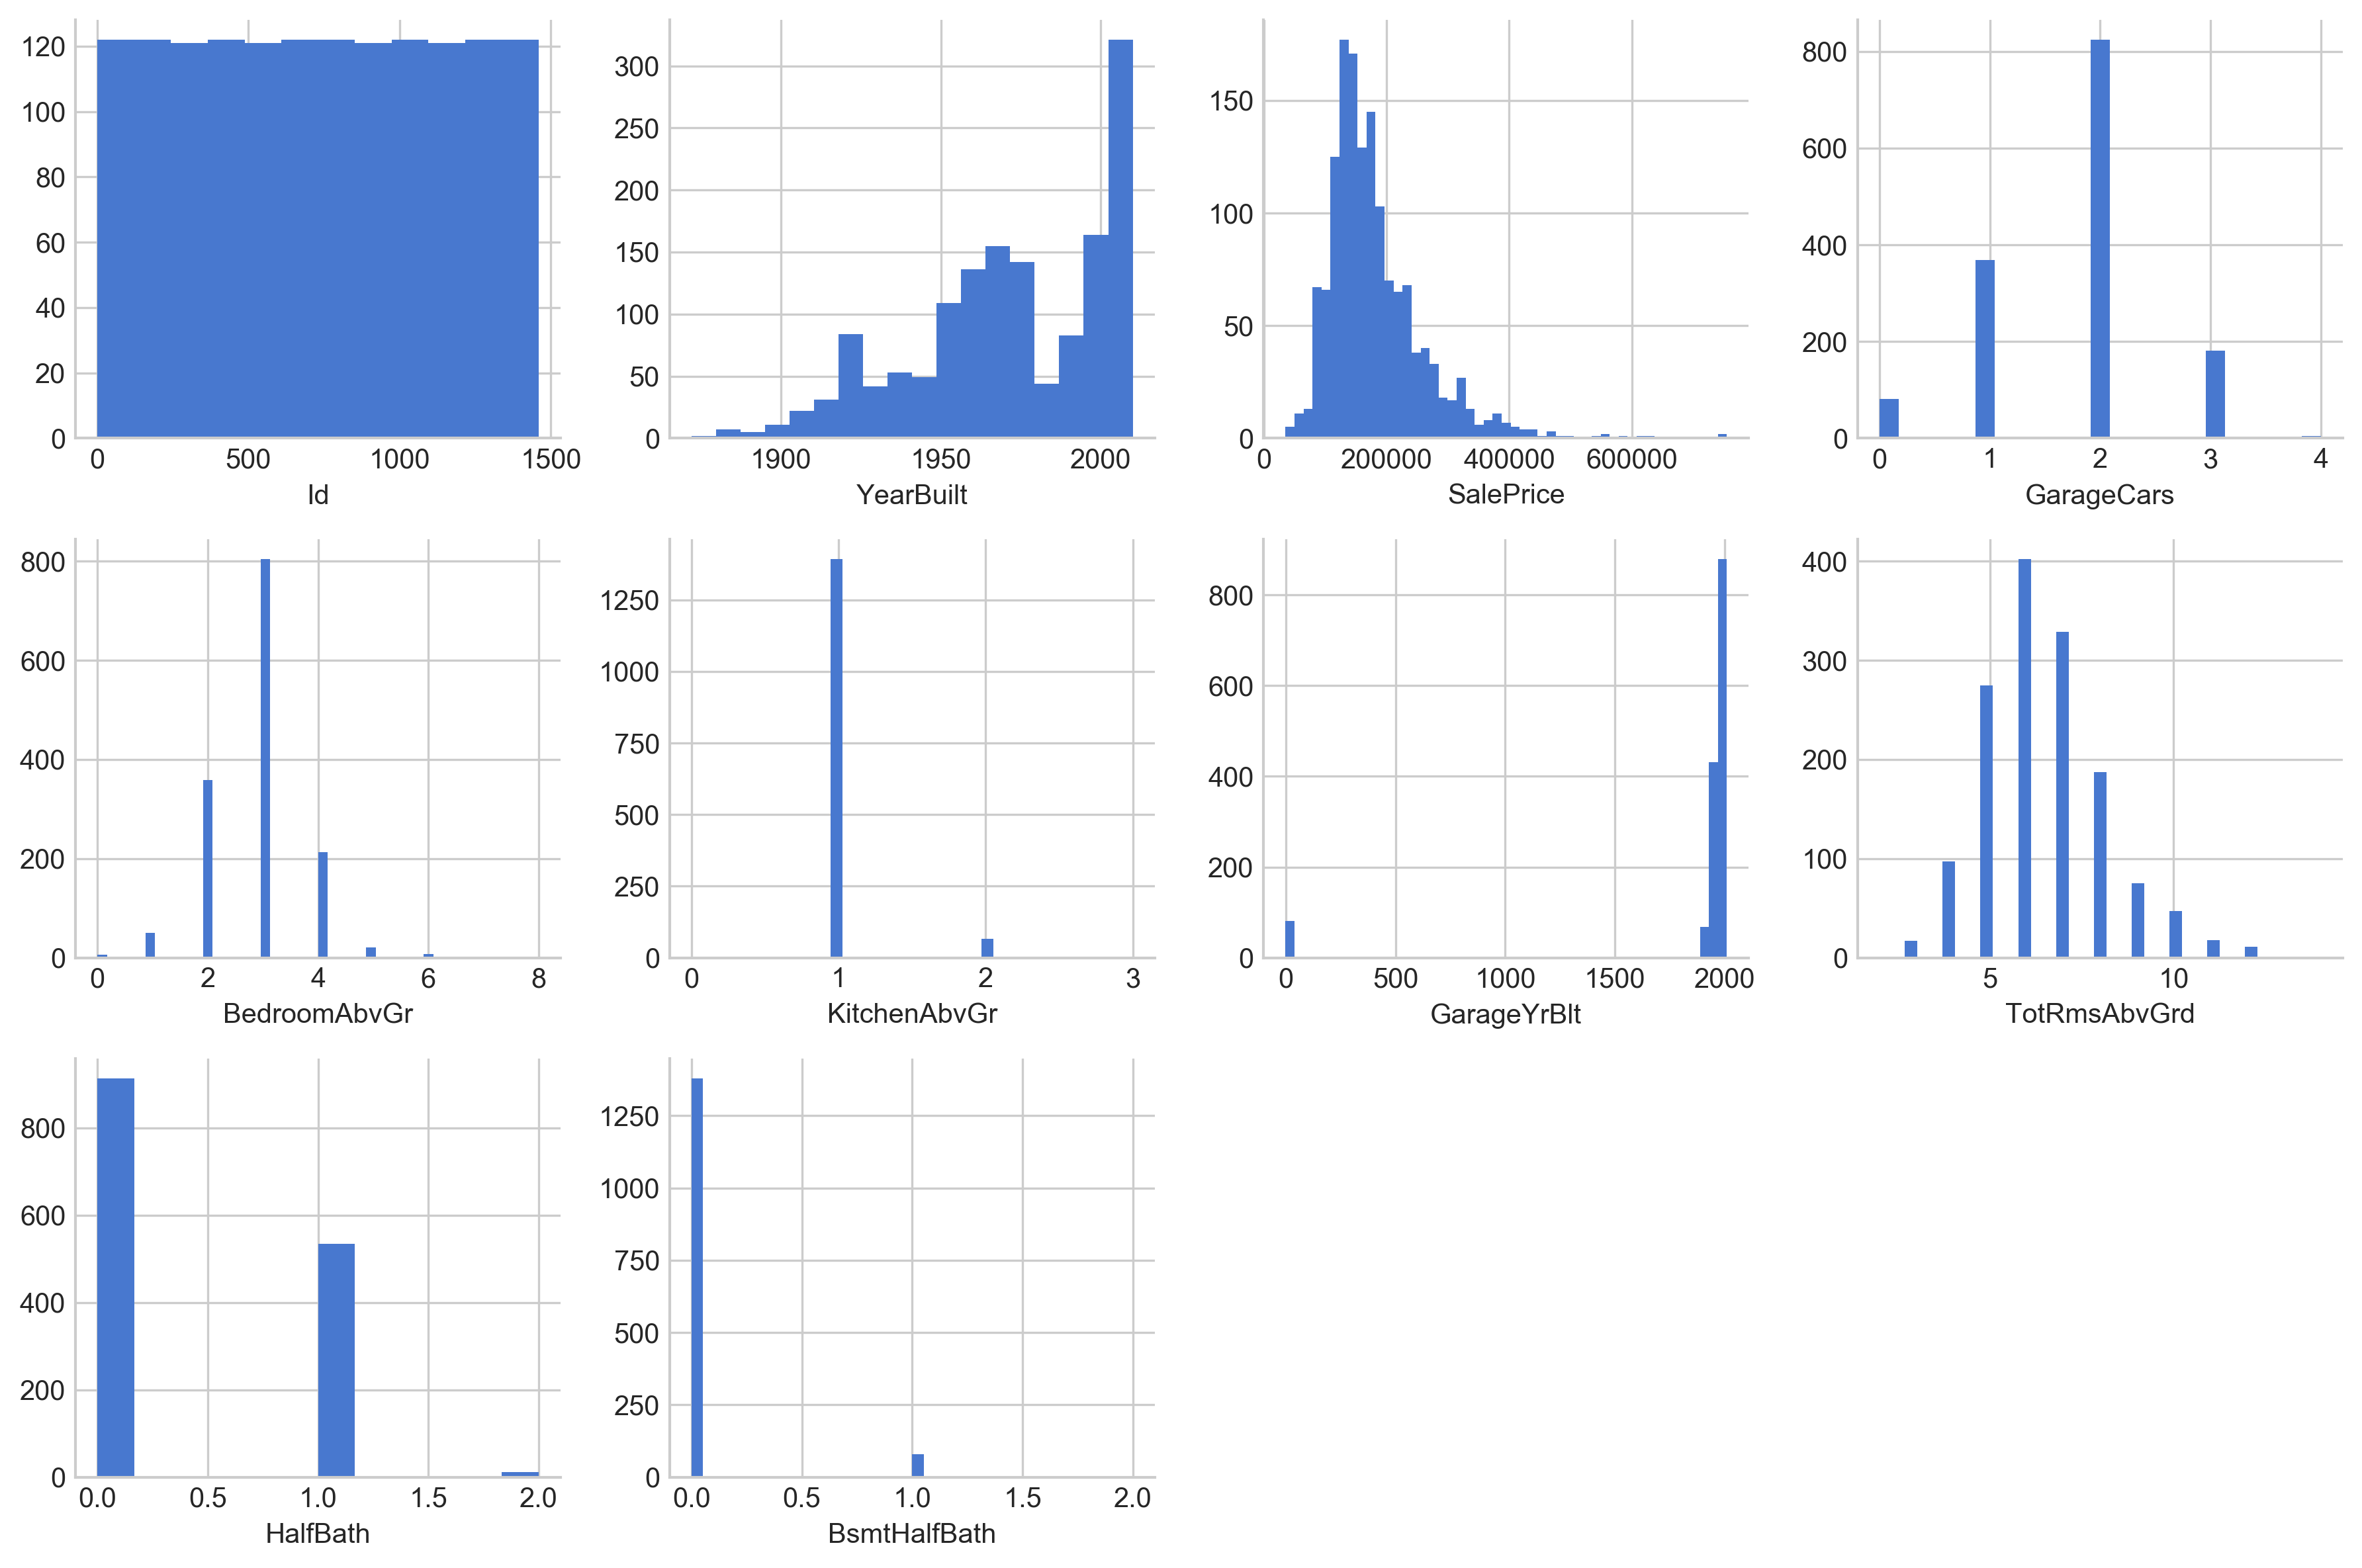

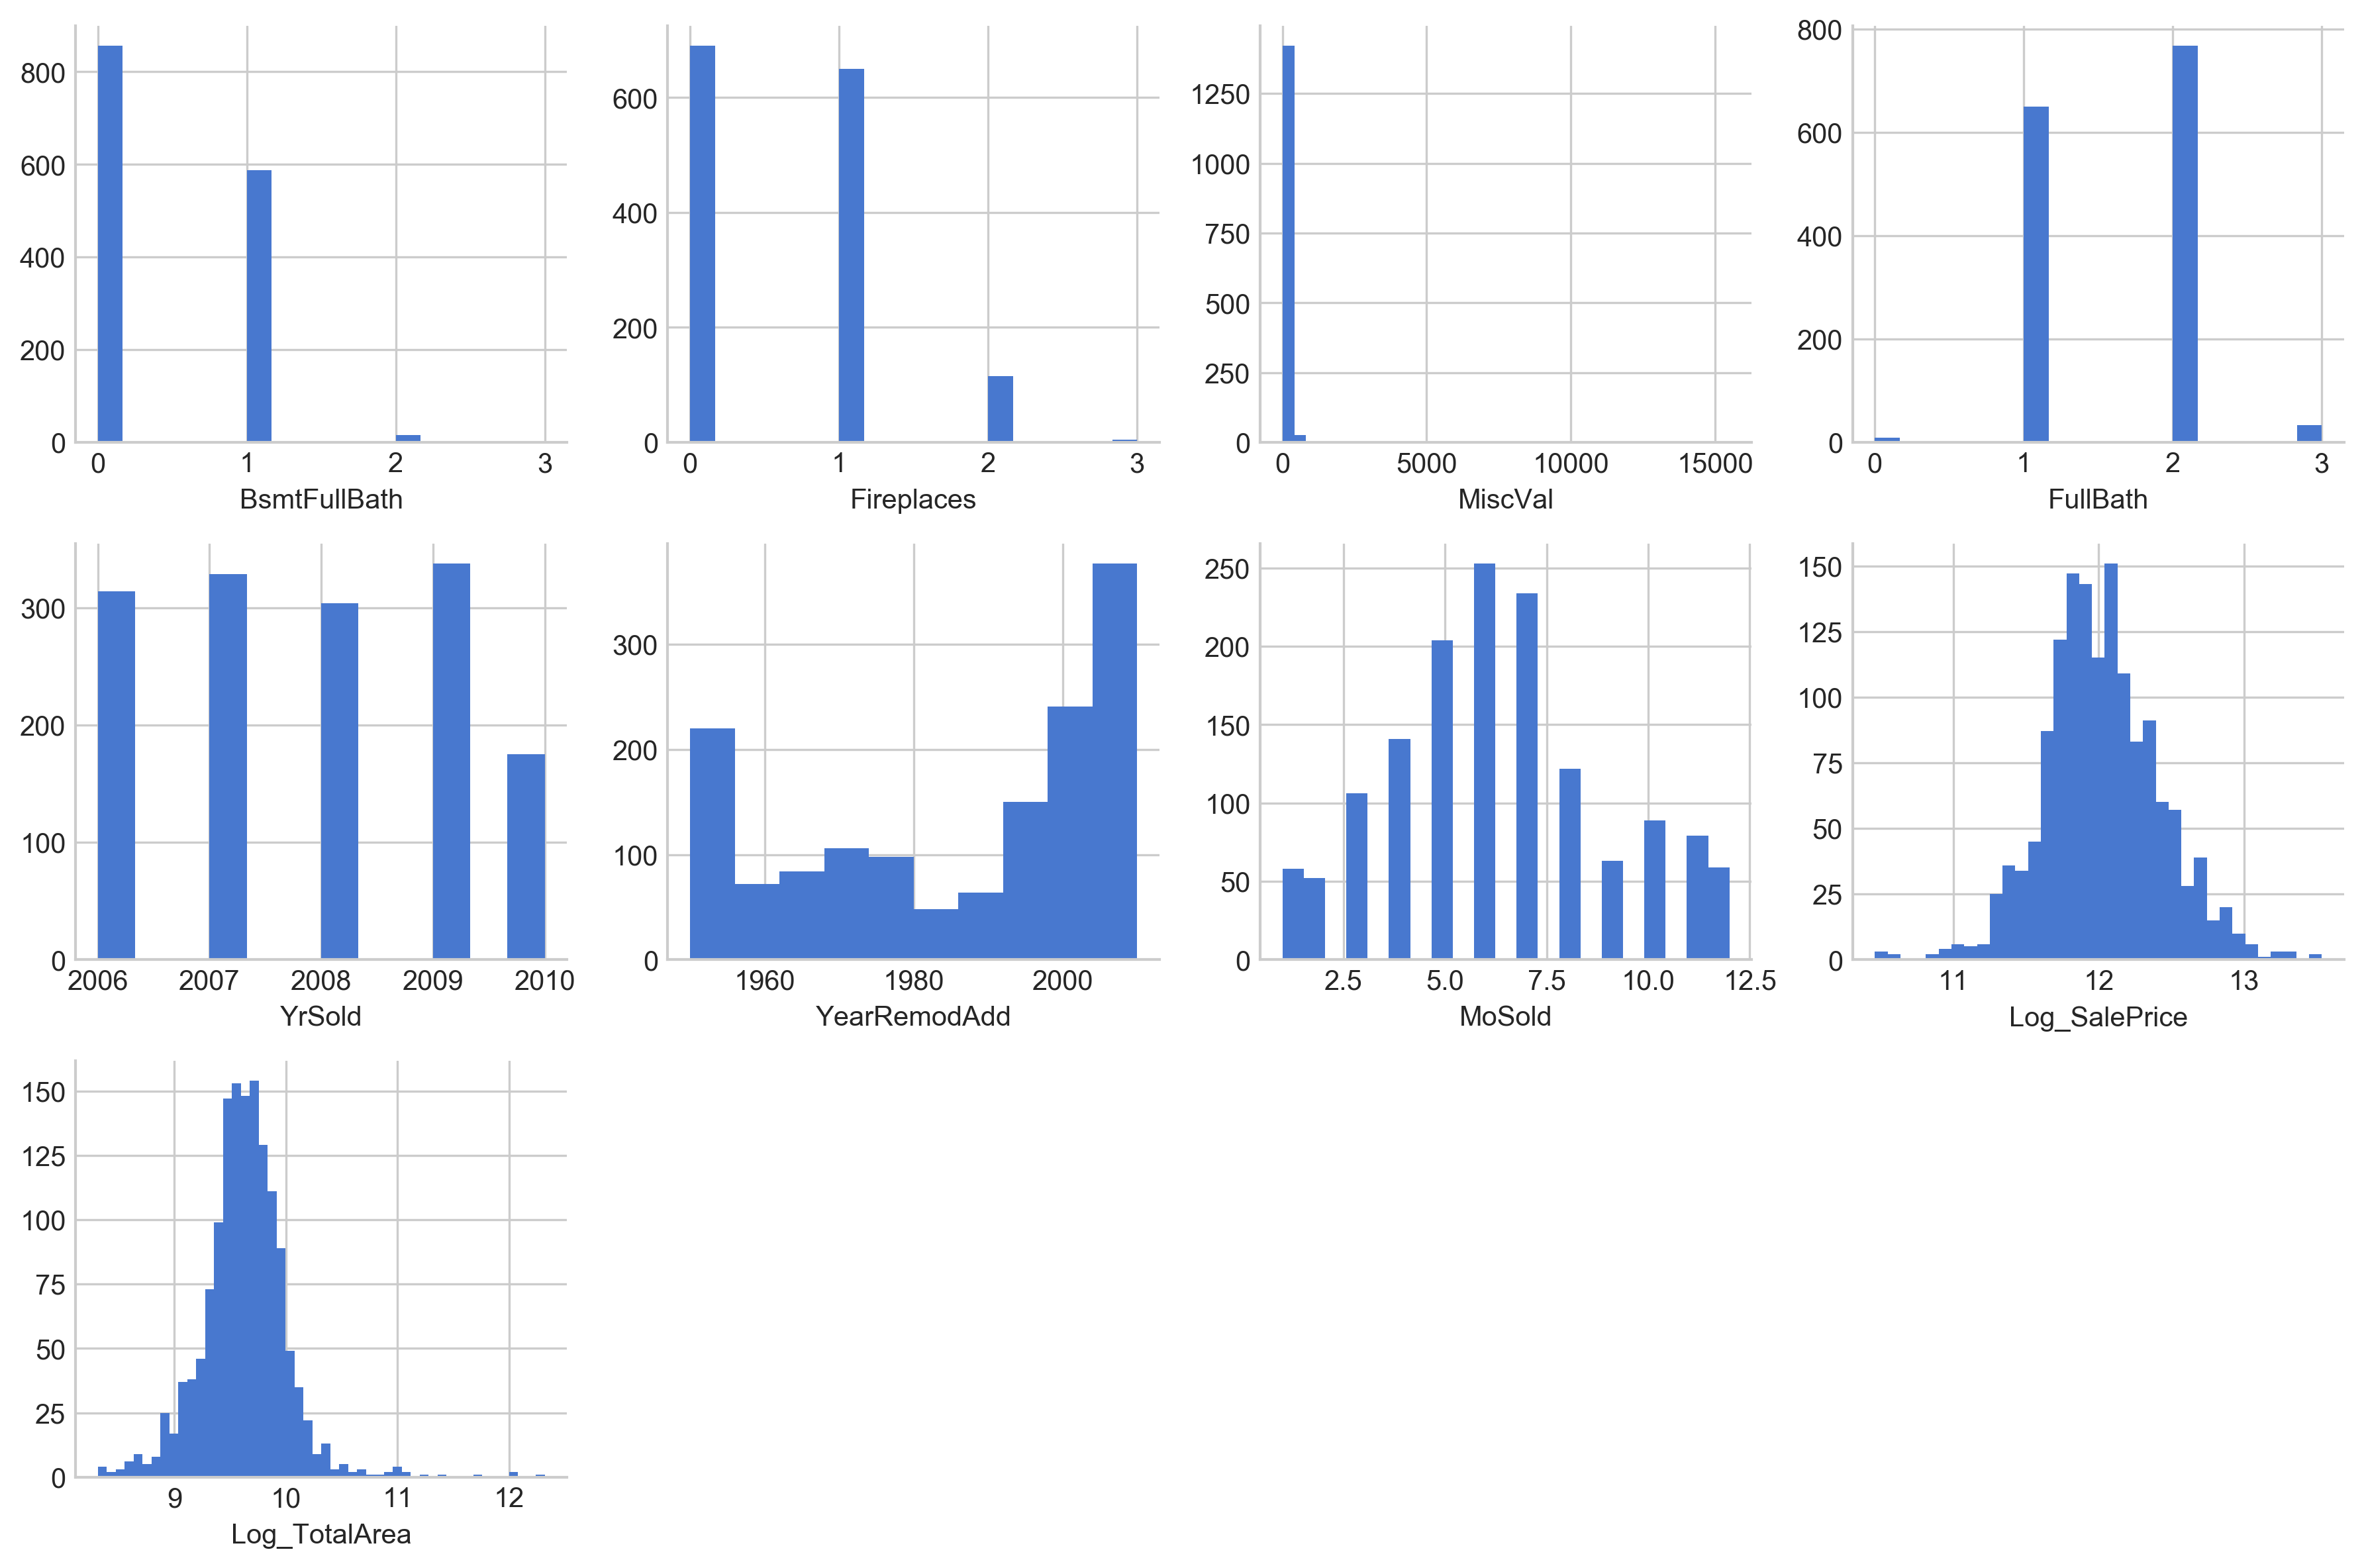

In [34]:
#dist_plots(train_dataset,continuous_predictors[24:36])
dist_plots(train_dataset,continuous_predictors[:10])
dist_plots(train_dataset,continuous_predictors[10:])

In [35]:
train_dataset[continuous_predictors].describe()

,Id,YearBuilt,SalePrice,GarageCars,BedroomAbvGr,KitchenAbvGr,GarageYrBlt,TotRmsAbvGrd,HalfBath,BsmtHalfBath,BsmtFullBath,Fireplaces,MiscVal,FullBath,YrSold,YearRemodAdd,MoSold,Log_SalePrice,Log_TotalArea
count,1460.00,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,730.50,1971.2678,180921.1959,1.7671,2.8664,1.0466,1868.6842,6.5178,0.3829,0.0575,0.4253,0.6130,43.489,1.5651,2007.8158,1984.8658,6.3219,12.0241,9.6238
std,421.61,30.2029,79442.5029,0.7473,0.8158,0.2203,453.9260,1.6254,0.5029,0.2388,0.5189,0.6447,496.123,0.5509,1.3281,20.6454,2.7036,0.3994,0.3814
min,1.00,1872.0000,34900.0000,0.0000,0.0000,0.0000,-1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,2006.0000,1950.0000,1.0000,10.4603,8.3124
25%,365.75,1954.0000,129975.0000,1.0000,2.0000,1.0000,1958.0000,5.0000,0.0000,0.0000,0.0000,0.0000,0.000,1.0000,2007.0000,1967.0000,5.0000,11.7751,9.4306
50%,730.50,1973.0000,163000.0000,2.0000,3.0000,1.0000,1977.0000,6.0000,0.0000,0.0000,0.0000,1.0000,0.000,2.0000,2008.0000,1994.0000,6.0000,12.0015,9.6270
75%,1095.25,2000.0000,214000.0000,2.0000,3.0000,1.0000,2001.0000,7.0000,1.0000,0.0000,1.0000,1.0000,0.000,2.0000,2009.0000,2004.0000,8.0000,12.2737,9.8276
max,1460.00,2010.0000,755000.0000,4.0000,8.0000,3.0000,2010.0000,14.0000,2.0000,2.0000,3.0000,3.0000,15500.000,3.0000,2010.0000,2010.0000,12.0000,13.5345,12.3205


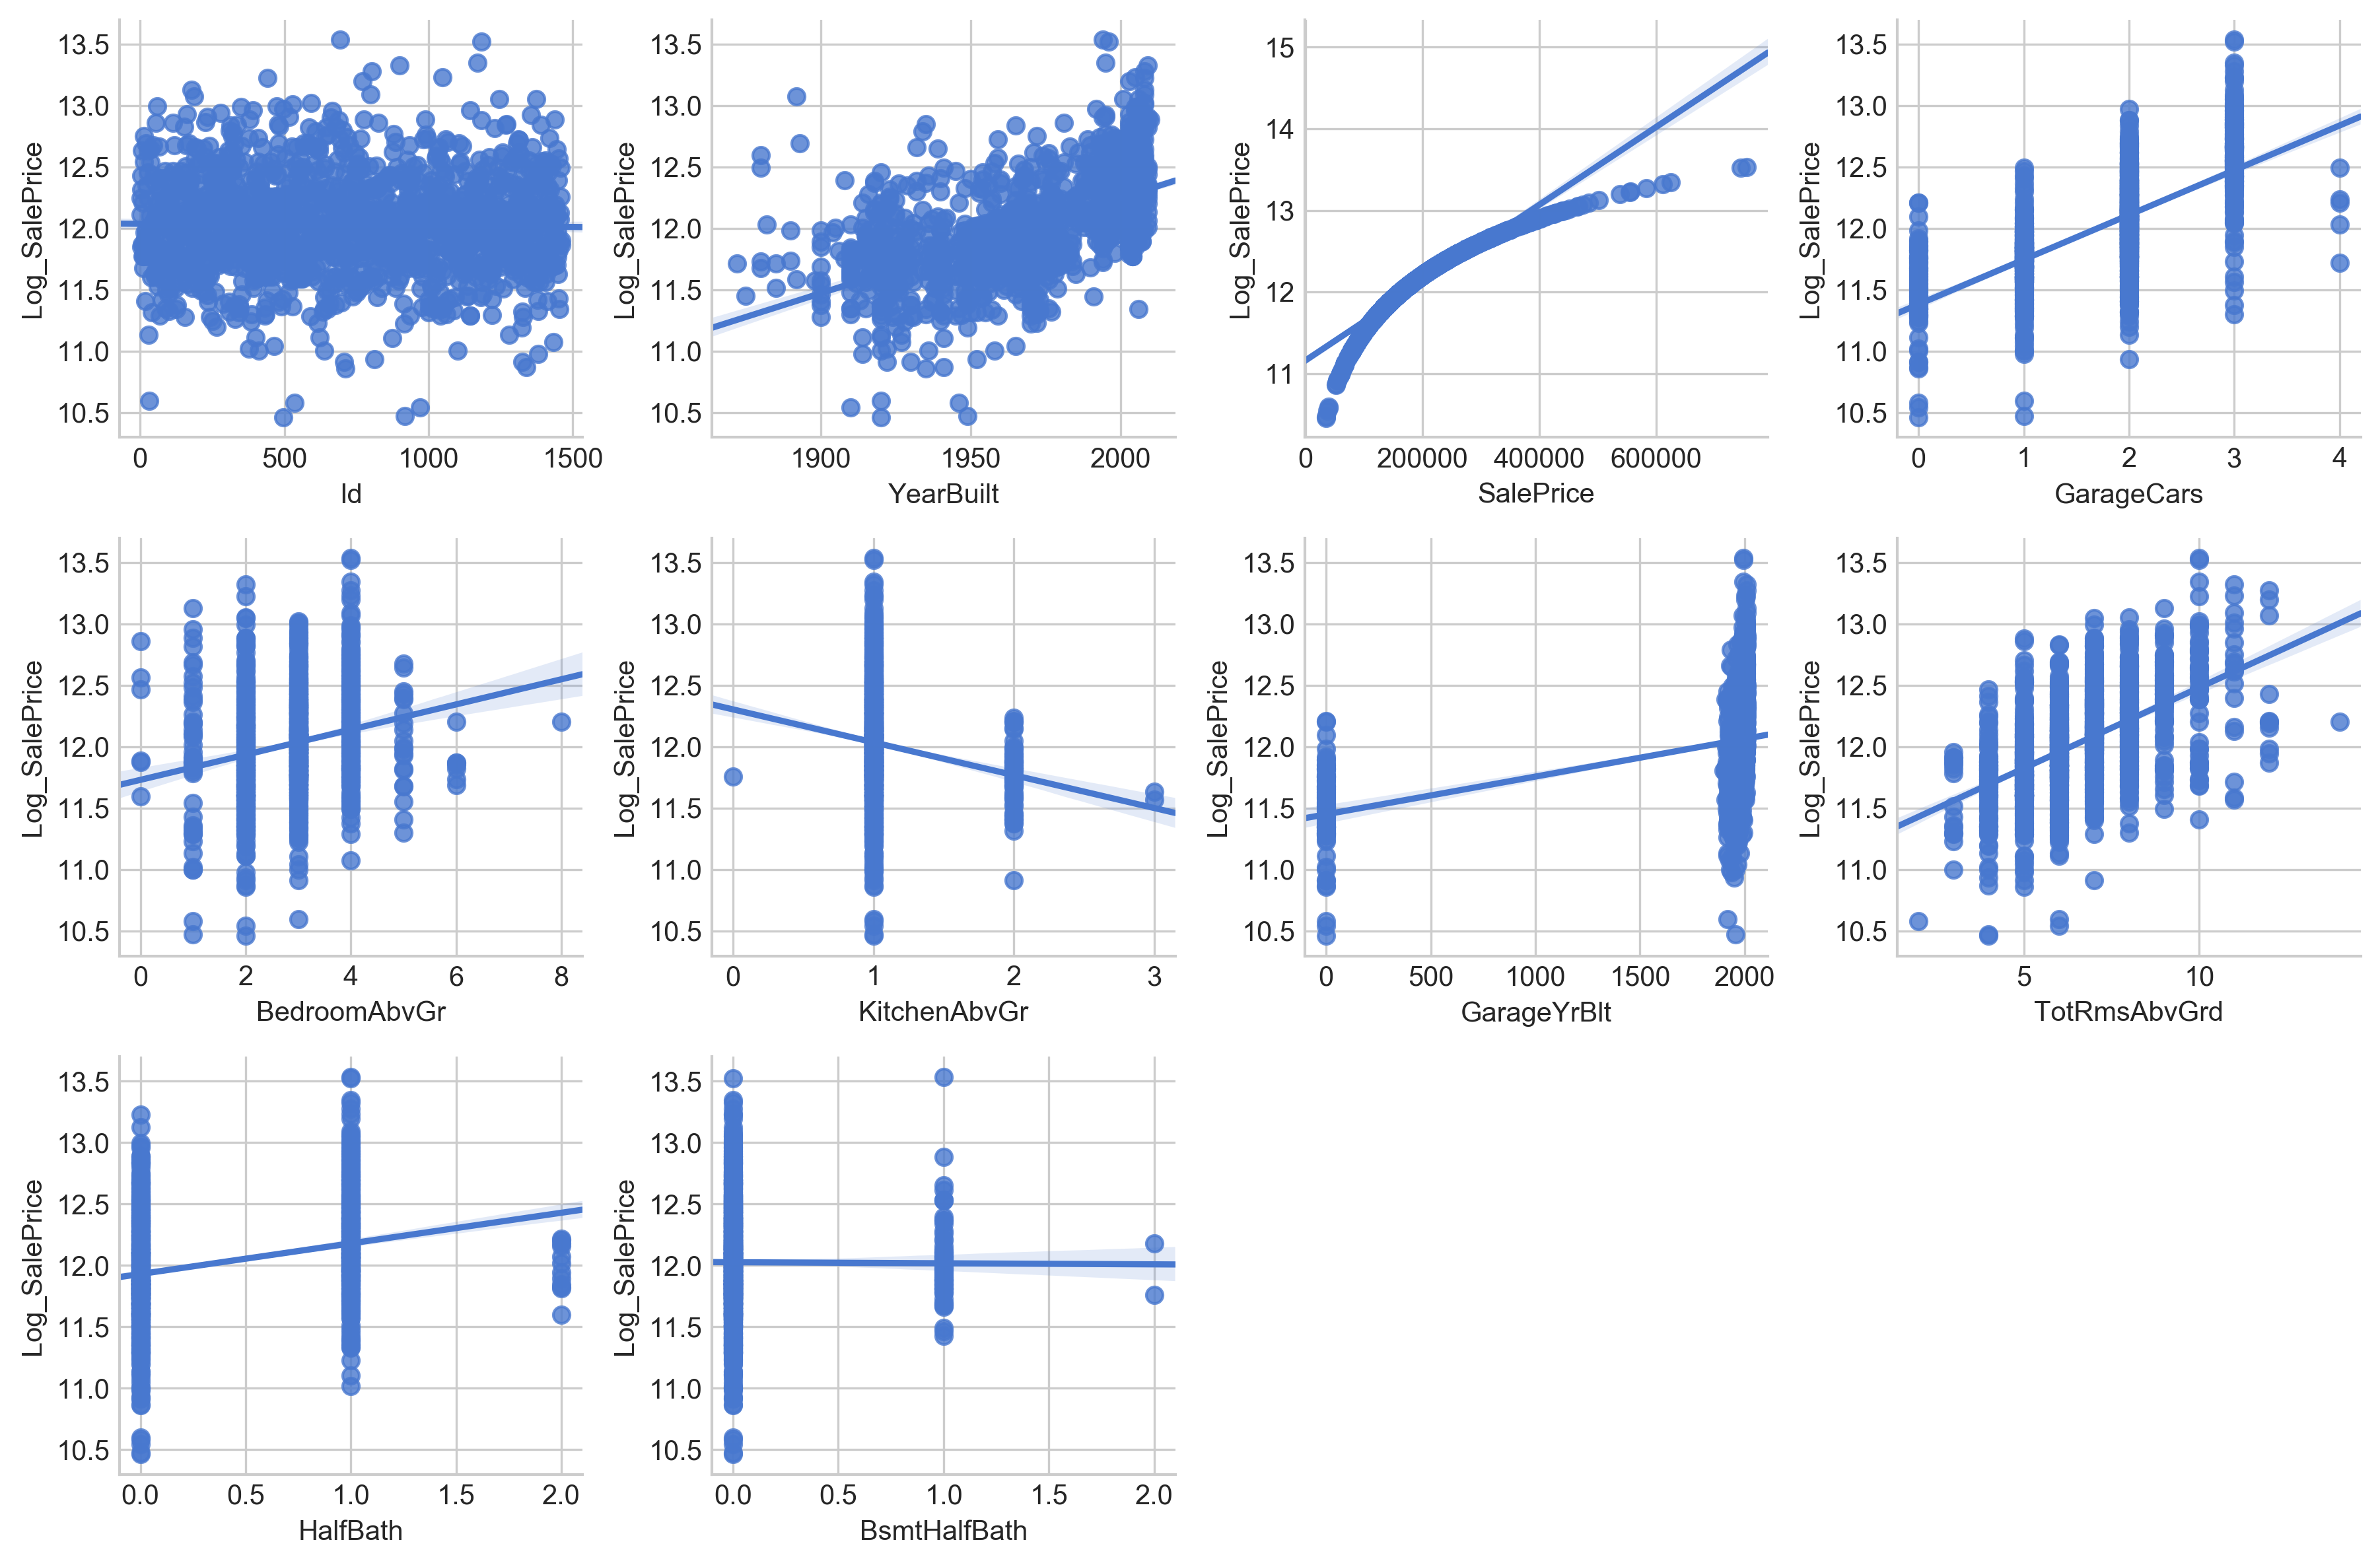

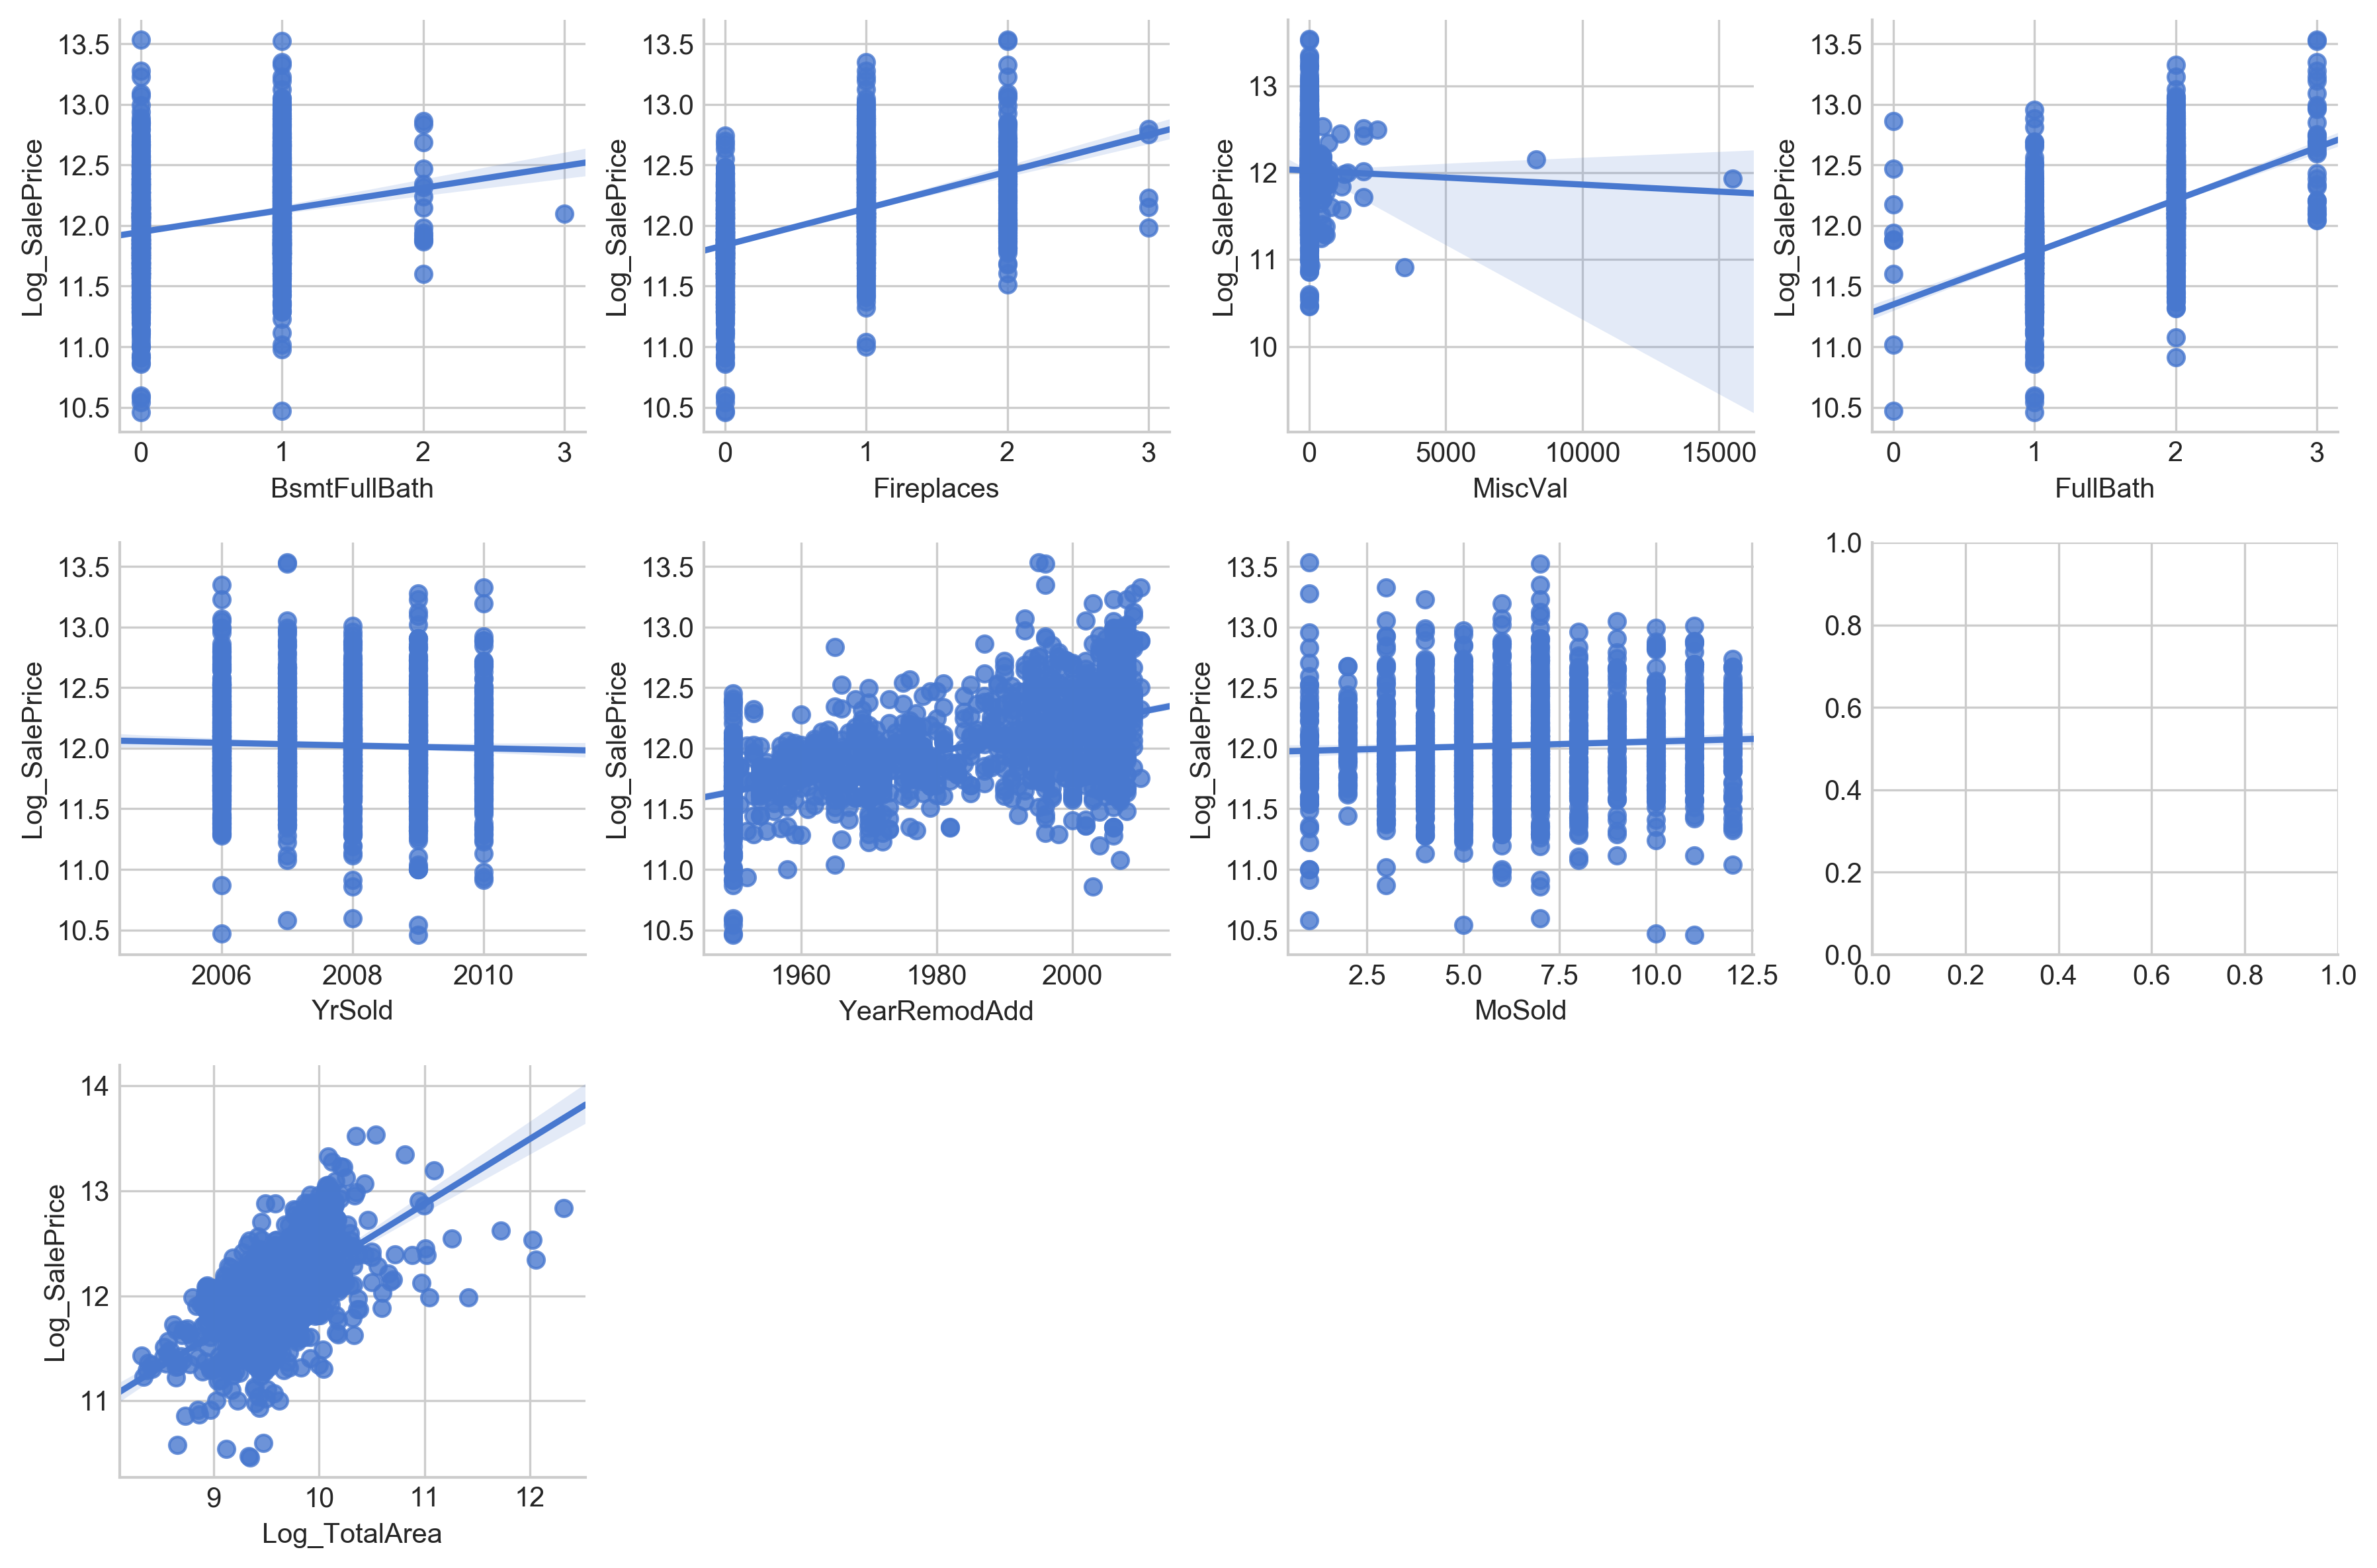

In [37]:
def reg_plots(train_dataset,continuous_features):
    fig = plt.figure(figsize=(12, 8),dpi=300)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(3,4, i+1)
        if continuous_features[i]!='Log_SalePrice':
            sns.regplot( x=continuous_features[i],y='Log_SalePrice', data =train_dataset ,ax=ax )
            sns.despine()
    plt.tight_layout()
    plt.show()
    
reg_plots(train_dataset,continuous_predictors[:10])
reg_plots(train_dataset,continuous_predictors[10:])


In [ ]:
#reg_plots(train_dataset,continuous_predictors[24:])

#### Feature Engineering

In [ ]:
#full_dataset["TotalArea"] = np.log(full_dataset["LotArea"] +full_dataset["LotFrontage"]+ full_dataset["TotalBsmtSF"]+
                             #full_dataset["GrLivArea"] +full_dataset["GarageArea"]+ full_dataset["PoolArea"])


In [ ]:


corr = train_dataset[continuous_predictors].corr()
plt.figure(figsize=(12,8))
ax =sns.heatmap(corr,cmap="coolwarm", linecolor='white',linewidths=1)

In [ ]:
def remodelled(years):
    built_year,remodelled_year=years
    return int(built_year !=remodelled_year)

full_dataset["Is_Remodelled"] =full_dataset[["YearBuilt","YearRemodAdd"]].apply(remodelled,axis=1)


In [ ]:
full_dataset["Is_New"] =full_dataset[["YearBuilt","YrSold"]].apply(lambda row: int(row["YearBuilt"]==row["YrSold"]),axis=1)


In [ ]:
#full_dataset[["TotalArea","YearBuilt","YearRemodAdd","YrSold","Is_Remodelled","Is_New"]].head(50)

In [ ]:
#Z

In [ ]:
#full_dataset,full_dataset_ignore = one_hot_dataframe(full_dataset, ['Sex','Title','Deck_Level'], replace=True)

In [ ]:

train_dataset =full_dataset[full_dataset['SalePrice'].notnull()]
print(train_dataset['SalePrice'].head())
train_dataset['SalePrice'] =  np.log1p(train_dataset['SalePrice'])
print(train_dataset['SalePrice'].head())
test_dataset =full_dataset[full_dataset['SalePrice'].isnull()]
print(train_dataset.shape)
train_dataset.head()

#### Check how these continuous predictors effect SalePrice 

In [ ]:
from sklearn.model_selection  import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model  import Ridge,RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
 
test_size = 0.33
seed = 7

drop_features = ['Id','SalePrice','TotalArea','YearBuilt','YearRemodAdd','YrSold']
train_y = train_dataset['SalePrice']
train_Id  =train_dataset["Id"]
test_Id =test_X["Id"]
train_X = train_dataset.drop(drop_features,axis=1)

test_X = test_dataset.drop(drop_features,axis=1)


X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(train_X, train_y, test_size=test_size,random_state=seed)

In [ ]:
print(train_X.info())

In [ ]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [ ]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    plt.figure()
    plt.title("Validation Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [ ]:
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    plt.figure()
    plt.title("Learning Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g" ,label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [ ]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

In [ ]:
print(y_trainmodel[1:10])
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0],cv=10)
model_cv = regr_cv.fit(X_trainmodel,y = y_trainmodel)
y_pred= model_cv.predict(X= X_val)
print ("RMSLE Value For Ridge: ",rmsle(np.exp(y_val),np.exp(y_pred),False))

In [ ]:

alphas = np.array([10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)

model = Ridge()
gridRidge = GridSearchCV(estimator=model, param_grid=param_grid)

gridRidge.fit(X=X_trainmodel, y = y_trainmodel)

print(gridRidge.best_score_)
print(gridRidge.best_params_)
best_model = gridRidge.best_estimator_
print(best_model)

y_pred= best_model.predict(X= X_val)
print ("RMSLE Value For Ridge grid: ",rmsle(np.exp(y_val),np.exp(y_pred),False))

In [ ]:
rfreg_model = RandomForestRegressor(n_estimators=300) ### Test 0.44
rfreg_model.fit(X = X_trainmodel,y = y_trainmodel)
y_pred= rfreg_model.predict(X= X_val)

print ("RMSLE Value For Random Forest: ",rmsle(np.exp(y_val),np.exp(y_pred),False))

In [ ]:
features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features['importance'] = rfreg_model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(4, 20))

In [ ]:
def print_null_report(X_data):
    check_null = X_data.isnull().sum()[X_data.isnull().sum()>0] 
    print("<{0} {1} {0}>".format("="*35,"null value count"))
    print(check_null)
    
print_null_report(X_trainmodel)
print_null_report(test_X)
print(test_X.shape)
print(X_trainmodel.shape)

In [ ]:
from sklearn.feature_selection import SelectFromModel,SelectKBest
from sklearn.feature_selection import mutual_info_regression
#model = SelectFromModel(rfreg_model, prefit=True,threshold=0.02)
model = SelectKBest(mutual_info_regression,k=40)
model =model.fit(X_trainmodel,y_trainmodel)
reduced_train= model.transform(X_trainmodel)
reduced_validation =model.transform(X_val)
reduced_test =model.transform(test_X)
X_trainmodel =reduced_train
X_val =reduced_validation
test_X =reduced_test
print(reduced_train.shape)
print(reduced_validation.shape)
print(reduced_test.shape)

In [ ]:

param_grid = {"n_estimators": [500],
    "max_depth": [None],
    "max_features": ['log2'],
    "min_samples_split": [3],
    "min_samples_leaf": [1, 3]
             }

model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

grid.fit(X=X_trainmodel, y = y_trainmodel)

print(grid.best_score_)
print(grid.best_params_)
best_model = grid.best_estimator_
print(best_model)


In [ ]:
from sklearn.model_selection import StratifiedKFold, learning_curve
train_sizes, train_scores, validation_scores = learning_curve(best_model, X_trainmodel,y_trainmodel.values.ravel(),cv=5)
plot_learning_curve(train_sizes, train_scores, validation_scores)

In [ ]:
training_scores, validation_scores = validation_curve(best_model, X_trainmodel,y_trainmodel.values.ravel(),
                                                      param_name="min_samples_split", param_range=range(3, 15,5), cv=5)
plot_validation_curve(range(3, 15,5), training_scores, validation_scores)


In [ ]:
Z

In [ ]:
y_pred= best_model.predict(X= X_val)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(y_val),np.exp(y_pred),False))
y_pred_test = best_model.predict(X=test_X)

In [ ]:
y_pred_result = best_model.predict(X= test_X )
print(y_pred_result[1:10])
y_pred_result = np.exp(y_pred_result)
print(y_pred_result[1:10])
FORMAT = '%Y%m%d%H%M%S'
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="submission_housing"+timestamp+"_out.csv"
submission = pd.DataFrame({
        "Id": test_Id,
        "SalePrice": y_pred_result
    })
submission.to_csv(filename, index=False)


In [ ]:
from sklearn.model_selection import StratifiedKFold, learning_curve
 
train_sizes, train_scores, validation_scores = learning_curve(best_model, X_trainmodel,y_trainmodel.values.ravel(),cv=5)
plot_learning_curve(train_sizes, train_scores, validation_scores)

training_scores, validation_scores = validation_curve(best_model, X_trainmodel,y_trainmodel.values.ravel(),
                                                      param_name="min_samples_split", param_range=range(3, 12,3), cv=5)
plot_validation_curve(range(3, 12,3), training_scores, validation_scores)


#min_samples_split